## Functions for Phugoid Osicllation

This notebook contains various functions required to study the phugoid oscillation notebook practically with tweaks and tricks. 

There are some redundant functions in this notebook as well, but they can be useful later on.

*If possible, try to make these functions more user-friendly*

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [14]:
#need some function to automate input of dt values into a numpy array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]).reshape(6,1)
print(dt_values, dt_values.shape)

[[0.1   ]
 [0.05  ]
 [0.01  ]
 [0.005 ]
 [0.001 ]
 [0.0001]] (6, 1)


In [198]:
#Code snippet to take user input as a numpy array. Always enter m = 1, as dt_value_array is a vector of n rows and one column
def userinput_dt_values():
    
    #do not enter comma ',' while entering the values of n and m in the input
    
    n, m = map(int, input().split()) # taking number of rows and column
    dt_values_array = numpy.array([input().strip().split() for _ in range(n)], float)
    
    print(dt_values_array)

In [199]:
userinput_dt_values()

3 1
0.1
0.05
0.01
[[0.1 ]
 [0.05]
 [0.01]]


In [20]:
#function to generate time steps for different dt values
def time_steps(T):
    time_step_arrays = []
    for i in range(0,dt_values.shape[0]):
        N1 = int(T/dt_values[i])+1
        t = numpy.linspace(0.0, T, num=N1)
        time_step_arrays.append(t)
    return time_step_arrays
time_steps(100.0)

[array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ]),
 array([0.000e+00, 5.000e-02, 1.000e-01, ..., 9.990e+01, 9.995e+01,
        1.000e+02]),
 array([0.000e+00, 1.000e-02, 2.000e-02, ..., 9.998e+01, 9.999e+01,
        1.000e+02]),
 array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 9.9990e+01, 9.9995e+01,
        1.0000e+02]),
 array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 9.9998e+01, 9.9999e+01,
        1.0000e+02]),
 array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 9.99998e+01,
        9.99999e+01, 1.00000e+02])]

In [22]:
#function to find numerical solution using Euler's method for one particular dt value
#Drawback of this function:works for one set of z0, b0 and zt values.
def numerical_sol(T, dt, z0, b0, zt):
    g = 9.81
    
    #Time-steps generator
    N = int(T/dt)+1
    for i in range(0,N):
        t = numpy.linspace(0.0, T, num=N)
    
    #Set initial value of numerical solution.
    #Later this array acts as a bin to store latest zn and bn values
    u = numpy.array([z0, b0])
    
    #An array to store the elevation (z values) at each time step
    z = numpy.zeros(N)
    #initialize first value of the array of z values
    z[0] = z0
    
    
    #Temporal solution using Euler's method
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt*rhs
        z[n] = u[0]
        
    return z

In [23]:
numerical_sol(100.0, 0.01, 100.0, 10.0, 100.0)

array([100.        , 100.1       , 100.2       , ...,  96.60653005,
        96.71101708,  96.81553741])

In [24]:
#To find exact solutions for one particular dt value
def exact_sol(T, dt, z0, b0, zt):
    
    g = 9.81
    
    #Time-steps generator
    N = int(T/dt)+1
    for i in range(0,N):
        t = numpy.linspace(0.0, T, num=N)
    
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
           (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    
    return z_exact

In [25]:
exact_sol(100.0, 0.01, 100.0, 10.0, 100.0)

array([100.        , 100.09999984, 100.19999869, ...,  96.77218359,
        96.8716869 ,  96.97122091])

In [28]:
#To simply plot exact and numerical sol for one particular dt value
def plot_sols(T, dt, z0, b0, zt):
    
    #Time-steps generator
    N = int(T/dt)+1
    for i in range(0,N):
        t = numpy.linspace(0.0, T, num=N)
    
    # Plot the numerical solution and the exact solution.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(t[0], t[-1])  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    #plot of numerical solution
    pyplot.plot(t, numerical_sol(T, dt, z0, b0, zt), label='Numerical',
                color='C0', linestyle='-', linewidth=2)
    #plot of exact solution
    pyplot.plot(t, exact_sol(T, dt, z0, b0, zt), label='Analytical',
                color='C3', linestyle='-', linewidth=2)
    pyplot.legend();  # set the legend
    

In [65]:
def plot_numerical_sols(T, dt, z0, b0, zt):
    #Time-steps generator
    N = int(T/dt)+1
    for i in range(0,N):
        t = numpy.linspace(0.0, T, num=N)
    
    # Plot the numerical solution and the exact solution.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(t[0], t[-1])  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    #plot of numerical solution
    pyplot.plot(t, numerical_sol(T, dt, z0, b0, zt), label='Numerical',
                color='C0', linestyle='-', linewidth=2)
    

In [66]:
def plot_exact_sols(T, dt, z0, b0, zt):
    #Time-steps generator
    N = int(T/dt)+1
    for i in range(0,N):
        t = numpy.linspace(0.0, T, num=N)
    
    # Plot the numerical solution and the exact solution.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(t[0], t[-1])  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    #plot of exact solution
    pyplot.plot(t, exact_sol(T, dt, z0, b0, zt), label='Analytical',
                color='C3', linestyle='-', linewidth=2)
    

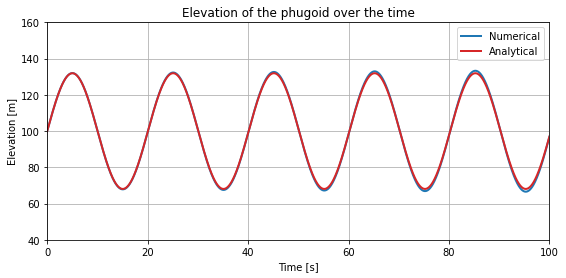

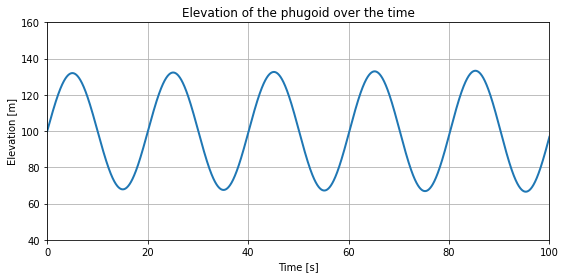

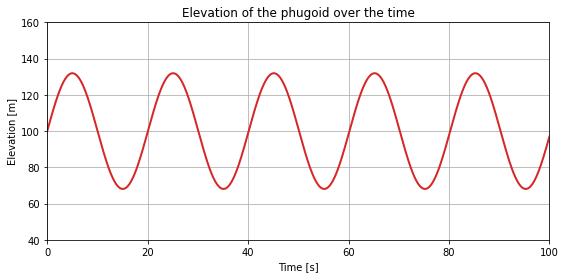

In [67]:
plot_sols(100.0, 0.01, 100.0, 10.0, 100.0)
plot_numerical_sols(100.0, 0.01, 100.0, 10.0, 100.0)
plot_exact_sols(100.0, 0.01, 100.0, 10.0, 100.0)

In [200]:
#To find simple error, i.e. abs(z - z_exact) and plot it against the time duration (0, T)
def simple_error(T, dt, z0, b0, zt):
    
    #Time-steps generator
    N = int(T/dt)+1
    for i in range(0,N):
        t = numpy.linspace(0.0, T, num=N)
    
    #Calculate simple error
    s_error = numpy.abs(numerical_sol(T, dt, z0, b0, zt) - exact_sol(T, dt, z0, b0, zt))
    s_error_reshaped = s_error.reshape(s_error.shape[0], 1)
    
    # Plot the simple error between numerical solution and the exact solution.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Simple error over the time')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(0, T)  # set the x-axis limits
    pyplot.ylim(0.0, 18.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    #plot of simple error
    pyplot.plot(t, s_error_reshaped, label='Simple Error',
                color='C7', linestyle='-', linewidth=2)
    
    return s_error
    

array([0.00000000e+00, 1.63499919e-07, 1.30799742e-06, ...,
       1.65653541e-01, 1.60669820e-01, 1.55683498e-01])

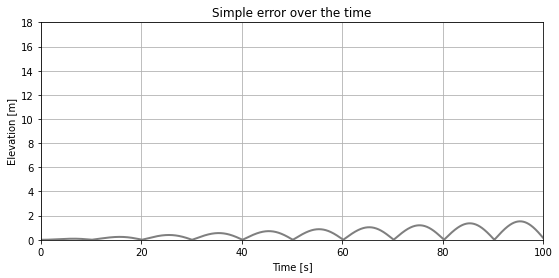

In [201]:
simple_error(100.0, 0.01, 100.0, 10.0, 100.0)

### The above plot shows that the error increases at the end as the number of iterations increases. 

In [31]:
#To find L1 error
def l1_error(T, dt, z0, b0, zt):
    
    error = dt * numpy.sum(numpy.abs(numerical_sol(T, dt, z0, b0, zt) - exact_sol(T, dt, z0, b0, zt)))
    #numpy.sum collapses the whole array to one single value.
    return error

In [32]:
l1_error(100.0, 0.01, 100.0, 10.0, 100.0)

50.9668696233009

In [63]:
#TO calculate L1 errors for all the dt values, store them and also plot them 
def error_values(T, z0, b0, zt):
    error_values = []
    for i in range(0, dt_values1_reshaped.shape[0]):
        error_values.append(l1_error(T, dt_values1_reshaped[i], z0, b0, zt))
    # Plot the error versus the time-step size.
    pyplot.figure(figsize=(6.0, 6.0))
    pyplot.title('L1-norm error vs. time-step size')  # set the title
    pyplot.xlabel('$\Delta t$')  # set the x-axis label
    pyplot.ylabel('Error')  # set the y-axis label
    pyplot.grid()
    pyplot.loglog(dt_values1_reshaped, error_values,
                  color='C0', linestyle='--', marker='o')  # log-log plot
    pyplot.axis('equal');  # make axes scale equallyb
    return error_values

### dt_values1 array

In [174]:
#Creating the array of dt_values1_reshaped. Try to incorporate the dt_values_array userinput function here
dt_values1 = numpy.array([0.1, 0.05, 0.01, 0.005])
print(dt_values1.shape)
dt_values1_reshaped = dt_values1.reshape(dt_values1.shape[0], 1)
print(dt_values1_reshaped.shape)

#error_values(100.0, 100.0, 10.0, 100.0)

(4,)
(4, 1)


In [175]:
#To find the numerical sols, exact sols, find error values and plot both the error types for each dt value case. 
def combined(T, z0, b0, zt):
    error_values = []
    numerical_sols_storage = []
    exact_sols_storage = []
    simple_error_values = []
    for i in range(0, dt_values1_reshaped.shape[0]):
        #calculates l1 errors
        error_values.append(l1_error(T, dt_values1_reshaped[i], z0, b0, zt))
        
        #Calculates and plots simple errors
        simple_error(T, dt_values1_reshaped[i], z0, b0, zt)
       
        
        #calculates, stores and plots numerical solutions
        numerical_sols_storage.append(numerical_sol(T, dt_values1_reshaped[i], z0, b0, zt))
        
        #calcualtes, stores and plots exact solution
        exact_sols_storage.append(exact_sol(T, dt_values1_reshaped[i], z0, b0, zt))
        
    #plot_numerical_sols(T, dt_values1_reshaped[i], z0, b0, zt)
    #plot_exact_sols(T, dt_values1_reshaped[i], z0, b0, zt)
    
    # Plot the error versus the time-step size.
    pyplot.figure(figsize=(6.0, 6.0))
    pyplot.title('L1-norm error vs. time-step size')  # set the title
    pyplot.xlabel('$\Delta t$')  # set the x-axis label
    pyplot.ylabel('Error')  # set the y-axis label
    pyplot.grid()
    pyplot.loglog(dt_values1_reshaped, error_values,
                  color='C0', linestyle='--', marker='o')  # log-log plot
    pyplot.axis('equal');  # make axes scale equally
        
    return error_values, numerical_sols_storage, exact_sols_storage
          
    

([array([595.36733833]),
  array([272.67739754]),
  array([50.96686962]),
  array([25.2726943])],
 [array([100.        , 101.        , 102.        , ...,  91.2989138 ,
          92.90712607,  94.5238741 ]),
  array([100.        , 100.5       , 101.        , ...,  94.75726869,
          95.39076488,  96.02554684]),
  array([100.        , 100.1       , 100.2       , ...,  96.60653005,
          96.71101708,  96.81553741]),
  array([100.        , 100.05      , 100.1       , ...,  96.79319077,
          96.84418536,  96.89518782])],
 [array([100.        , 100.99983651, 101.99869226, ...,  94.98748282,
          95.97737893,  96.97122091]),
  array([100.        , 100.49997956, 100.99983651, ...,  95.97737893,
          96.47386754,  96.97122091]),
  array([100.        , 100.09999984, 100.19999869, ...,  96.77218359,
          96.8716869 ,  96.97122091]),
  array([100.        , 100.04999998, 100.09999984, ...,  96.8716869 ,
          96.92145013,  96.97122091])])

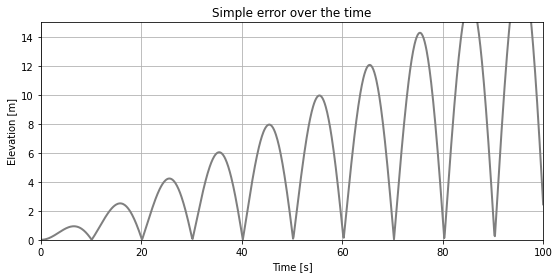

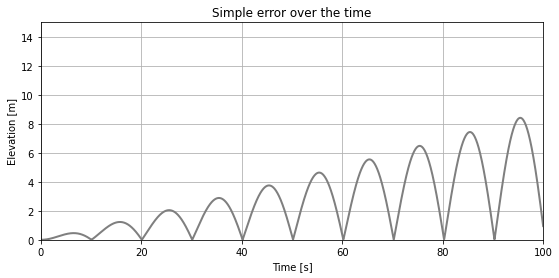

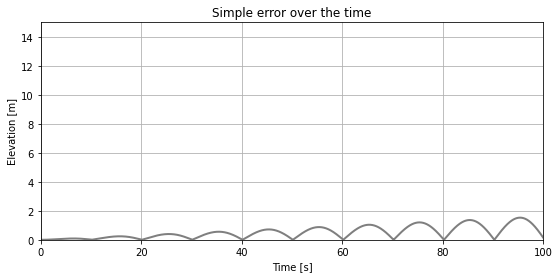

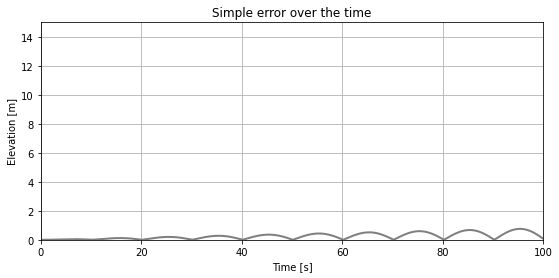

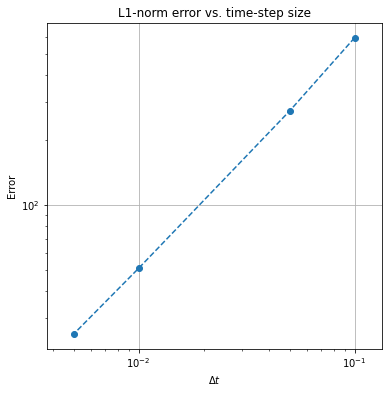

In [176]:
combined(100.0, 100.0, 10.0, 100.0)

In [179]:
#Derived from combined(...) funtion to find all the required values in this module and also plot them
#to plot all the numerical solutions for different dts together. 
#X axis ranges from 0 to 100, Y axis ranges from 40 to 160
def all_plot(T, z0, b0, zt):
    #generate time steps 
    time_step_arrays = []
    for i in range(0, dt_values1_reshaped.shape[0]):
        N1 = int(T/dt_values[i])+1
        t = numpy.linspace(0.0, T, num=N1)
        time_step_arrays.append(t)
    
    #Calculate numerical sols, exact sols and l1 errors
    error_values, numerical_sols_storage, exact_sols_storage = combined(T, z0, b0, zt)
    print(numerical_sols_storage)
    
    # Plot the numerical solution.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time by Numerical Solution')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(0, T)  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    
    #plot of numerical solution
    for i in range(0, len(numerical_sols_storage)):
        pyplot.plot(time_step_arrays[i], numerical_sols_storage[i], label='Numerical', linestyle='-', linewidth=2)
        #pyplot.plot(time_step_arrays[i], exact_sols_storage[i], label='Exact',
                    #color='C3', linestyle='-', linewidth=2)
        
    # Plot the exact solution.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time by Exact Solution')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(0, T)  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    
    #plot of exact solution
    for i in range(0, len(exact_sols_storage)):
        pyplot.plot(time_step_arrays[i], exact_sols_storage[i], label='Exact',
                    color='C3', linestyle='-', linewidth=2)
    

[array([100.        , 101.        , 102.        , ...,  91.2989138 ,
        92.90712607,  94.5238741 ]), array([100.        , 100.5       , 101.        , ...,  94.75726869,
        95.39076488,  96.02554684]), array([100.        , 100.1       , 100.2       , ...,  96.60653005,
        96.71101708,  96.81553741]), array([100.        , 100.05      , 100.1       , ...,  96.79319077,
        96.84418536,  96.89518782])]


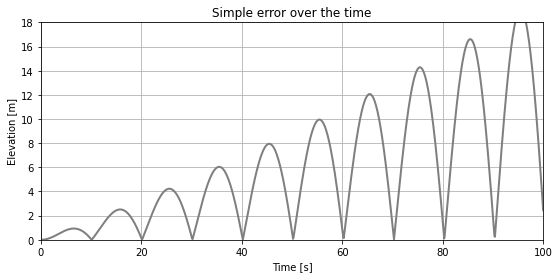

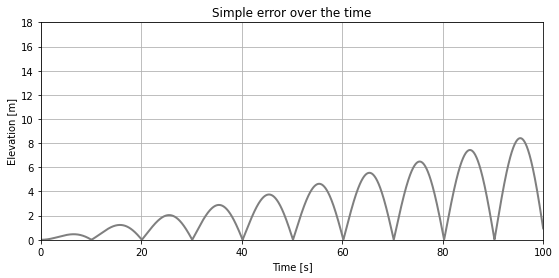

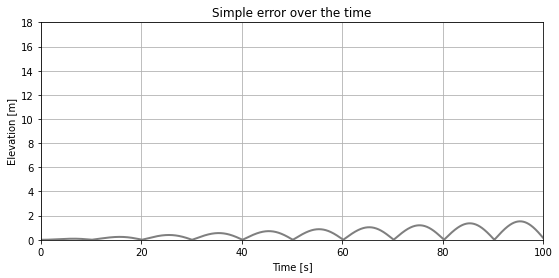

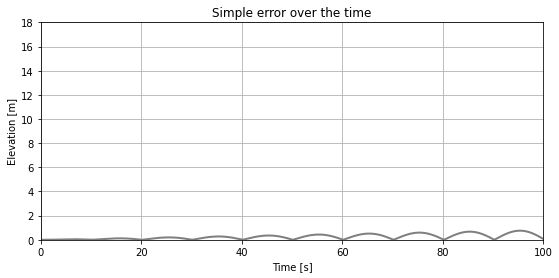

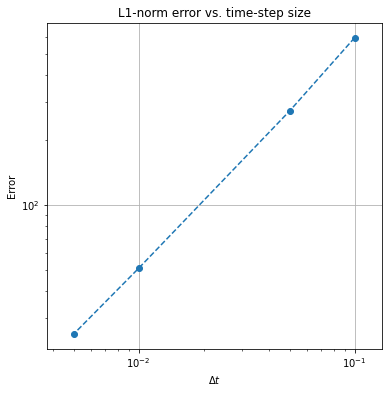

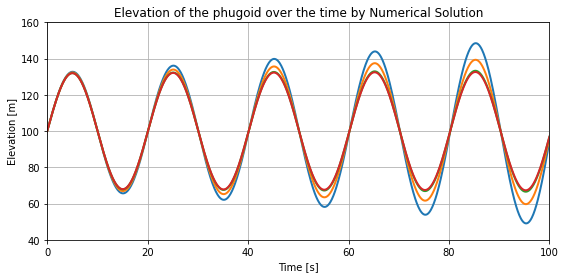

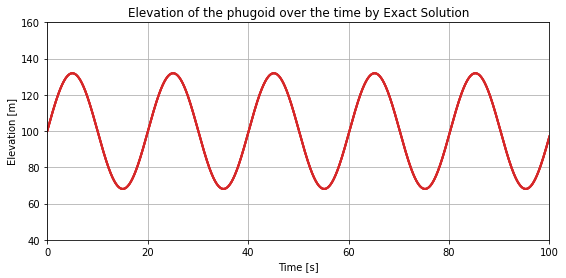

In [202]:
all_plot(100.0, 100.0, 10.0, 100.0)

### Conclusion

From the above result of the all_plot(...) function, we can see that the numerical sols create errors at the end of the time period, as the number of iterations increase. This can also be observed from the simple_error plots. 

As the dt values are reduced, the error reduces. This can be observed by both the simple_error plots and the l1_error plots. 

The exact solution remains conincident for all the dt values. In contrast, the numerical solution diverges towards the end of time period. The reason is the increasing error of the numerical solution as the number of iterations increase, as seen in the simple_error plots. This can be observed by comparing the last two plots of elevation vs time. 

#### Possible improvements: 

- Add the user input functionality to the all_plot function.
- Add code to incorporate effect of variation in z0 and b0 values.
- Try to reduce the number of for-loops to make the code run faster when very small values of dt are entered
